## 데이터 불러오기

In [1]:
import pandas as pd

# CSV 파일 경로
csv_file_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\df_inheritance_ver2.csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df_inheritance = pd.read_csv(csv_file_path, encoding='utf-8-sig')


# 불러온 데이터 확인
print(df_inheritance.head())

   판례정보일련번호         사건번호  선고     판결유형  \
0    238913  2023다221144  선고       판결   
1    240673   2021두52143  선고       판결   
2    237913   2023두44061  선고       판결   
3    237589  2022다302237  선고       판결   
4    236923   2022누32308  선고  판결 : 확정   

                                                판시사항  \
0   [1] 가분채권이 공동상속되는 경우의 법률관계 / 주식이 공동상속되는 경우, 공동...   
1    대한민국에서 주로 체류하며 대한민국에 있는 건축사무소 등에서 건축설계사로 근무하...   
2    [1] 구 상속세 및 증여세법 제19조 제1항, 제2항에 따른 배우자 상속공제의...   
3    [1] ‘유증’과 ‘사인증여’의 구별  [2] 망인이 단독행위로서 유증을 하였으...   
4    甲이 유언 없이 사망하자 공동상속인들인 甲의 배우자 乙과 자식들이 구 상속세 및...   

                                                판결요지  \
0   [1] 금전채권과 같이 급부의 내용이 가분인 채권은 공동상속되는 경우 상속개시와 ...   
1                                                NaN   
2    [1] 구 상속세 및 증여세법(2020. 12. 22. 법률 제17654호로 개...   
3    [1] 유증은 유언으로 수증자에게 일정한 재산을 무상으로 주기로 하는 행위로서 ...   
4    甲이 유언 없이 사망하자 공동상속인들인 甲의 배우자 乙과 자식들이 구 상속세 및...   

                                                참조조문  \
0   [1] 민법 제269조, 제278조

In [10]:
df_inheritance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례정보일련번호      4162 non-null   int64 
 1   사건번호          4162 non-null   object
 2   선고            4162 non-null   object
 3   판결유형          4162 non-null   object
 4   판시사항          3248 non-null   object
 5   판결요지          2930 non-null   object
 6   참조조문          3221 non-null   object
 7   참조판례          1933 non-null   object
 8   판례내용          4162 non-null   object
 9   판례내용_상단       4162 non-null   object
 10  판례내용_이유       4162 non-null   object
 11  판례내용_이유(전처리)  4142 non-null   object
dtypes: int64(1), object(11)
memory usage: 390.3+ KB


In [3]:
# 데이터 처리 및 분석
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 문자
import re

In [4]:
import pandas as pd

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

#### 불용어 제거하기

In [5]:
#한국어 처리를 의한 라이브러리 사용 
# Counter: 데이터를 카운팅하여 빈도수를 계산하기 위한 모듈, 주로 단어 빈도 계산에 사용
from collections import Counter

# konlpy의 Okt: 한국어 형태소 분석기. 텍스트를 형태소 단위로 분리하거나 품사 태깅에 사용
from konlpy.tag import Okt

# CountVectorizer: 문서에서 단어 빈도 수를 기반으로 피처 벡터를 생성하는 사이킷런의 도구
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\sorted_words_20241022.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1', 
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외', '이라', '한다', 
                  '하여','으로부터', ').', '이라는', '따르면', '이고', '과는', '다가', '내렸으나',
                  '있던', '없으므로', '에는', '000', '있는', '하기로', '이라고', '하였고', '의하여',
                  '이를', '있고', '하게', '없는', '라고', '되지', '있다고', '의하면', '지는',
                  '있어', '하였다고', '없다고', '아니한', '없이', '있어', '하였다고', '없다고', '아니한',
                  '없이', '속인', '이건', '인한', '하였', '받은', '있어서', '정당하고', '상대로', '그렇다면',
                  '것임'
                  ]

pattern =  r'제\d+|\d+호증|\d+호|\d+달러|\d+원|\d+만원|\d+만|\d+억|\d+억원'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 불용어 제거 함수 (리스트 상태로 처리)
def remove_stopwords(phrase):
    if not isinstance(phrase, str):  # 입력이 문자열이 아닌 경우 빈 문자열 반환
        return ''
    
    # Okt 객체를 생성하여 형태소 분석
    okt = Okt()
    
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(phrase)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)  # 패턴에 매칭되면 제외
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

def remove_digits_and_letters(text):
    # 000, ooo, OOO 반복 제거 및 알파벳과 숫자 조합 제거
    text = re.sub(r'(000|ooo|OOO)+', '', text)  # 반복되는 패턴 제거
    text = re.sub(r'\d+[가-힣]+', '', text)  # 숫자와 알파벳 조합 제거
    return text

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
df_inheritance['판례내용_제거(불용어)'] = df_inheritance['판례내용_이유(전처리)'].apply(remove_stopwords).apply(remove_digits_and_letters)

# 결과 확인
print(df_inheritance['판례내용_제거(불용어)'])


0       개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...
1       인과 대한민국 혼인신고 마쳤고 자녀   미합중국 캘리포니아 출생 미합중국 시민권 취...
2       지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세  거주 자의 사망 배우자 실...
3       유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...
4       지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...
                              ...                        
4157    안컨대 목록 부동산 4285.9 전라남도 관재 대금 1,067,400 낙찰 4286...
4158    개론 오면 생모 순덕 중매 의논 망부 김준 밀양 금융조합 채무 변제 본건 가옥 경매...
4159    본건 부동산 단기    관재 당국 임차 가족 동거 본건 재결 하였다는 다툼 바이 본...
4160    안컨대 모되 장남 양수호 부첩 맺어 사변 침점 사망 쌍방 다툼 임의 호주 상속인 본...
4161    어업권 물권 단정하에 어업권 공유 어업 법규 고찰 정시 어업권 법적 성질 판이한 이...
Name: 판례내용_제거(불용어), Length: 4162, dtype: object


In [22]:
df_inheritance.to_csv(r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\df_inheritance.csv',index=False)

In [ ]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\82102\Downloads\no-f\NoF\temp_jh\sorted_words_20241022.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1', 
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외', '이라', '한다', 
                  '하여','으로부터', ').', '이라는', '따르면', '이고', '과는', '다가', '내렸으나',
                  '있던', '없으므로', '에는', '000', '있는', '하기로', '이라고', '하였고', '의하여',
                  '이를', '있고', '하게', '없는', '라고', '되지', '있다고', '의하면', '지는',
                  '있어', '하였다고', '없다고', '아니한', '없이', '있어', '하였다고', '없다고', '아니한',
                  '없이', '속인', '이건', '인한', '하였', '받은', '있어서', '정당하고', '상대로', '그렇다면',
                  '것임'
                  ]

pattern =  r'제\d+|\d+호증|\d+호|\d+달러|\d+원|\d+만원|\d+만|\d+억|\d+억원'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 불용어 제거 함수 (리스트 상태로 처리)
def remove_stopwords(phrase):
    if not isinstance(phrase, str):  # 입력이 문자열이 아닌 경우 빈 문자열 반환
        return ''
    
    # Okt 객체를 생성하여 형태소 분석
    okt = Okt()
    
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.nouns(phrase)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)  # 패턴에 매칭되면 제외
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

def remove_digits_and_letters(text):
    # 000, ooo, OOO 반복 제거 및 알파벳과 숫자 조합 제거
    text = re.sub(r'(000|ooo|OOO)+', '', text)  # 반복되는 패턴 제거
    text = re.sub(r'\d+[가-힣]+', '', text)  # 숫자와 알파벳 조합 제거
    return text

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
df_nouns = pd.DataFrame()
df_nouns['판례내용_제거(불용어)'] = df_inheritance['판례내용_이유(전처리)'].apply(remove_stopwords).apply(remove_digits_and_letters)

# 결과 확인
print(df_nouns['판례내용_제거(불용어)'])


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

vectorizer = TfidfVectorizer()

tfidf_metrix = vectorizer.fit_transform(df_inheritance['판례내용_제거(불용어)'])

# 1. K-Means 클러스터링 설정
num_clusters = 8  # 원하는 클러스터 개수 설정
kmeans_all = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # n_init 값을 명시적으로 설정

# 2. K-Means 모델 학습
kmeans_all.fit(tfidf_metrix)

# 3. 클러스터 레이블을 데이터프레임에 추가
df_inheritance['클러스터(all)'] = kmeans_all.labels_

# 4. 클러스터링 결과 확인
print("클러스터링 결과:")
print(df_inheritance[['판례내용_제거(불용어)', '클러스터(all)']].head())

클러스터링 결과:
                                        판례내용_제거(불용어)  클러스터(all)
0  개요 사실관계 망인 은행 예금 채권 은행 판매 투자신탁 형태 MMF Money Ma...          4
1  인과 대한민국 혼인신고 마쳤고 자녀   미합중국 캘리포니아 출생 미합중국 시민권 취...          4
2  지난 보충 보충 상속세 증여 세법 개정 되기 전의 증세  거주 자의 사망 배우자 실...          1
3  유증 유언 증자 일정한 재산 무상 주기 단독행위 사인증여 증여 생전 무상 재산 수여...          4
4  지위 유언 남기지 사망 아내 자녀 상속세 신고 부과 경과 한꺼 표시 상속세 신고 남...          1


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 클러스터 중심 단어 추출 함수
def extract_cluster_keywords(kmeans, feature_names, num_clusters):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = []  # 각 클러스터에 대한 빈 리스트 생성
        for ind in order_centroids[i, :20]:  # 각 클러스터에서 상위 20개 단어
            cluster_keywords[i].append(feature_names[ind])  # 중심 단어를 리스트에 추가
    return cluster_keywords

# TF-IDF 피처 이름과 클러스터 중심 단어 추출
feature_names_all = vectorizer.get_feature_names_out()  # TF-IDF 단어 목록
cluster_keywords_all = extract_cluster_keywords(kmeans_all, feature_names_all, num_clusters)

# 클러스터 중심 단어 출력
print("\n전체 단어 사용 TF-IDF 클러스터 중심 단어:")
for cluster_num, keywords in cluster_keywords_all.items():
    print(f"클러스터 {cluster_num + 1}: {keywords}")

# 각 클러스터별 상위 단어 및 TF-IDF 값 출력
order_centroids = kmeans_all.cluster_centers_.argsort()[:, ::-1]
print("\n클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :20]:  # 상위 20개의 단어
        print(f"단어: {feature_names_all[ind]} - TF-IDF 값: {kmeans_all.cluster_centers_[i, ind]}")



전체 단어 사용 TF-IDF 클러스터 중심 단어:
클러스터 1: ['토지', '점유', '등기', '소유권', '이전', '환지', '분할', '소유', '취득', '명의', '취득시효', '건물', '주소', '지번', '매매', '소유권보존등기', '매수', '도로', '사업', '원인']
클러스터 2: ['상속', '재산', '유류분', '분할', '상속인', '부동산', '한정승인', '피상', '증여', '포기', '민법', '채무', '반환', '망인', '개시', '협의', '가액', '목록', '유증', '신고']
클러스터 3: ['망인', '보험', '손해', '지급', '위자료', '손해배상', '차량', '유족', '연금', '사망', '보험금', '운전', '운행', '자동차', '배상', '수입', '의무', '회사', '공제', '계약']
클러스터 4: ['임야', '종중', '등기', '소유권', '명의', '이전', '분묘', '소유권보존등기', '소유', '점유', '명의신탁', '토지', '대장', '부동산', '분할', '지번', '원인', '본건', '상속', '매수']
클러스터 5: ['상속', '신청', '주택', '부동산', '계약', '사망', '건물', '토지', '채권', '재산', '호주', '회사', '등기', '소송', '지급', '망인', '상속인', '사업', '민법', '권리']
클러스터 6: ['등기', '부동산', '소유권', '이전', '명의', '토지', '원인', '상속', '명의신탁', '매매', '점유', '상속인', '취득', '본건', '소유', '소유권보존등기', '매수', '사망', '회복', '목록']
클러스터 7: ['농지', '분배', '농지개혁법', '토지', '상환', '등기', '본건', '소유권', '완료', '경작', '이전', '명의', '매수', '시행', '매매', '농가', '증명', '소유', '취득', '정부']
클러스터 8: ['가액', '상속세', '과세

In [10]:
# 필요한 패키지 import
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc
import platform

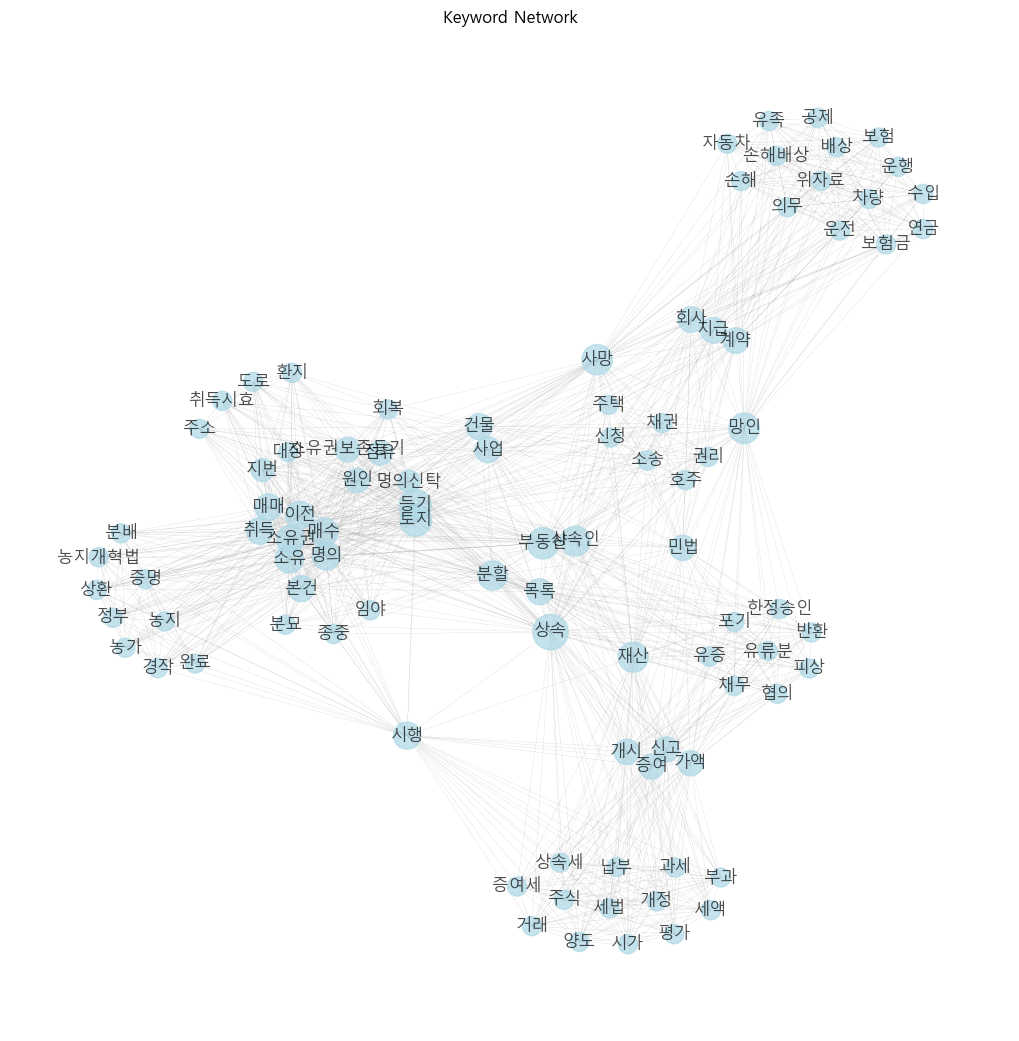

In [11]:
cluster_keywords = cluster_keywords_all

# 한글폰트 설정 (윈도우즈에서만)
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

# 마이너스 폰트 설정 (깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 네트워크 그래프 생성
G = nx.Graph()

# 클러스터별 키워드를 노드로 추가하고, 키워드 간 엣지 설정
for cluster, keywords in cluster_keywords.items():
    for keyword in keywords:
        G.add_node(keyword, cluster=cluster)  # 노드 추가
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])  # 엣지 추가

# 노드 라벨 설정
for node in G.nodes():
    G.nodes[node]['label'] = node  # 노드 이름을 라벨로 설정

# 레이아웃 설정 (스프링 레이아웃)
pos = nx.spring_layout(G, k=0.3)  # k 값 조절하여 노드 간 간격 조절

# 노드 크기 설정 (degree를 기반으로)
node_sizes = [d for n, d in G.degree()]

# 시각화
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, font_family=plt.rcParams['font.family'],  # 윈도우즈에서는 한글 폰트 사용
        node_size=[d * 10 for d in node_sizes],  # 노드 크기 조절
        node_color='lightblue',
        alpha=0.7,  # 노드 투명도
        width=0.1,  # 선 두께
        edge_color='gray')
plt.title('Keyword Network')
plt.show()

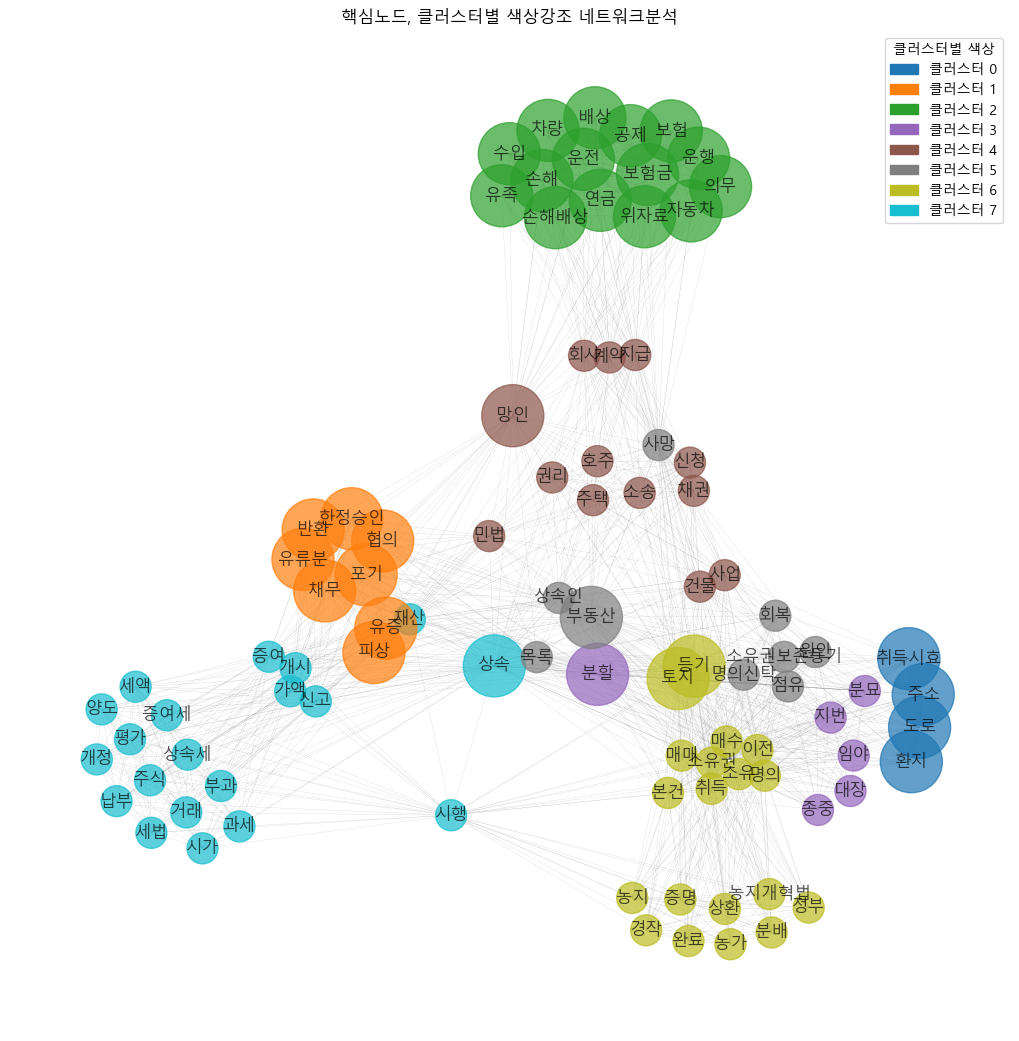

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib import cm
import matplotlib.patches as mpatches

# 클러스터별 키워드를 노드로 추가하고, 키워드 간 엣지 설정
G = nx.Graph()
for cluster, keywords in cluster_keywords.items():
    for keyword in keywords:
        G.add_node(keyword, cluster=cluster)  # 노드 추가
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])  # 엣지 추가

# 레이아웃 설정
pos = nx.spring_layout(G, k=0.3)

# 클러스터별 색상 설정
num_clusters = len(cluster_keywords)
cluster_colors = plt.get_cmap('tab10', num_clusters)

# 클러스터별 색상 매핑 및 범례 생성
color_map = {}  # 클러스터와 색상 매핑
legend_handles = []  # 범례 핸들 추가
for idx, cluster in enumerate(cluster_keywords.keys()):
    color = cluster_colors(idx)
    color_map[cluster] = color  # 클러스터별 색상 매핑
    legend_handles.append(mpatches.Patch(color=color, label=f'클러스터 {cluster}'))

# 많이 연결된 노드는 핵심노드로 설정
degree_centrality = nx.degree_centrality(G) #중심성 계산
node_sizes = []
node_colors = []
for node in G.nodes():
    cluster = G.nodes[node]['cluster']
    max_centrality_in_cluster = max(degree_centrality[n] for n in G.nodes if G.nodes[n]['cluster'] == cluster)
    
    # 핵심 노드 크기
    if degree_centrality[node] == max_centrality_in_cluster:
        node_sizes.append(2000)
    else:
        node_sizes.append(500)
    
    # 클러스터 색상 설정
    node_colors.append(cluster_colors(cluster))

# 시각화
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, font_family=plt.rcParams['font.family'],
        node_size=node_sizes,
        node_color=node_colors,
        alpha=0.7,
        width=0.1,
        edge_color='gray')
plt.title('핵심노드, 클러스터별 색상강조 네트워크분석')
plt.legend(handles=legend_handles, title="클러스터별 색상", loc='upper right')
plt.show()


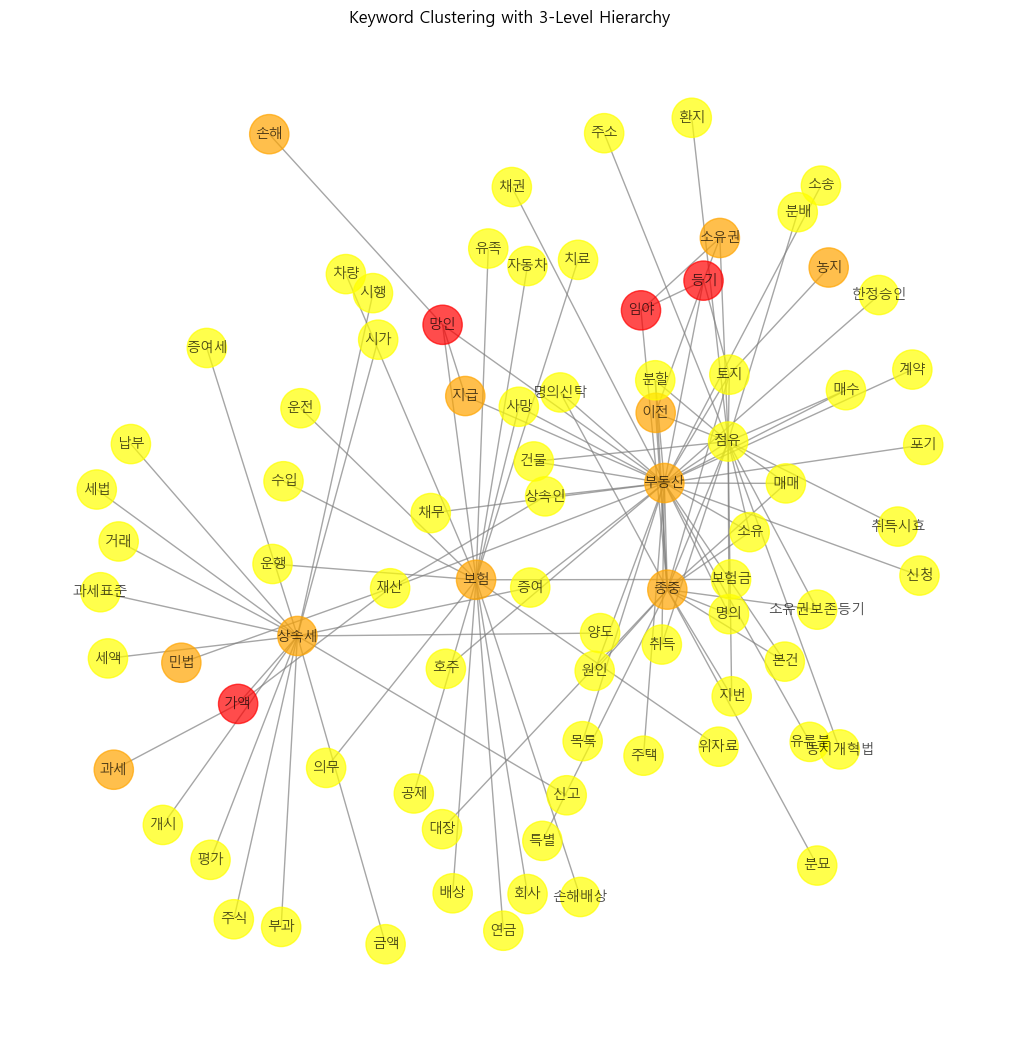

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 한글 폰트 설정 (Windows 시스템의 폰트 경로에서 불러오기)
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
    
# 마이너스 폰트 설정 (깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# TF-IDF 벡터라이저 설정
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# TF-IDF 벡터화 수행
tfidf_array = vectorizer.fit_transform(df_inheritance['판례내용_제거(불용어)'])
feature_names = vectorizer.get_feature_names_out()  # TF-IDF에서 사용된 키워드 목록

# K-Means 클러스터링 설정 및 수행
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(tfidf_array)
labels = kmeans.labels_

# 클러스터별 주요 키워드 추출 (상위, 중위, 하위)
cluster_keywords = {}
for i in range(num_clusters):
    cluster_indices = (labels == i)
    tfidf_cluster = tfidf_array[cluster_indices].mean(axis=0).A1  # numpy 배열을 1차원으로 변환
    sorted_keywords = [feature_names[idx] for idx in tfidf_cluster.argsort()[::-1]]
    cluster_keywords[f'Cluster {i+1}'] = sorted_keywords[:20]  # 클러스터별 상위 10개 키워드

# 네트워크 그래프 생성 및 레벨 구분
    # 상위 레벨: 가장 중심이 되는 키워드
    # 2레벨 키워드: 상위 키워드에 연결된 상위 3개 키워드
    # 3레벨 키워드: 2레벨 키워드에 연결된 하위 키워드

G = nx.Graph()
for cluster, keywords in cluster_keywords.items():
    # 상위 레벨: 가장 중심이 되는 키워드
    G.add_node(keywords[0], level=1, cluster=cluster)
    
    # 2레벨 키워드 연결
    for keyword in keywords[1:4]:
        G.add_node(keyword, level=2, cluster=cluster)
        G.add_edge(keywords[0], keyword)
    
    # 3레벨 키워드 연결
    for keyword in keywords[4:]:
        G.add_node(keyword, level=3, cluster=cluster)
        G.add_edge(keywords[1], keyword)  # 2레벨 키워드에 연결


# 노드 색상 설정 (레벨별 구분)
node_colors = []
for node in G.nodes(data=True):
    if node[1]['level'] == 1:
        node_colors.append('red')  # 상위 레벨
    elif node[1]['level'] == 2:
        node_colors.append('orange')  # 중간 레벨
    else:
        node_colors.append('yellow')  # 하위 레벨

# 레이아웃 및 시각화 설정
pos = nx.spring_layout(G, k=0.5)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, edge_color='gray', alpha=0.7, font_size=10, font_family='Malgun Gothic')
plt.title("Keyword Clustering with 3-Level Hierarchy")
plt.show()